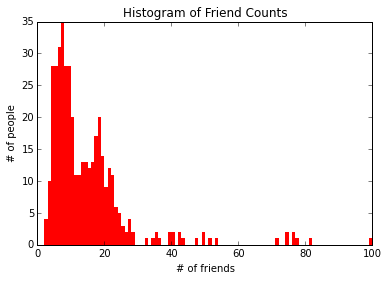

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy.random import poisson
from collections import Counter

# our fake data: number of friends per user on Data Sciencester
num_friends = list(poisson(7, 213)) + list(poisson(17, 177)) + list(poisson(42, 17)) + list(poisson(72, 7)) + [99]

# making histogram plot of number of friends per user
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys, edgecolor='none', width=1, color='r')
plt.axis([0, max(xs), 0, max(ys)])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


In [3]:
# truly "basic" stats on the above data
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
print(num_points, largest_value, smallest_value)

# more basic stats
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-1]
print(smallest_value, second_smallest_value, second_largest_value)

414 99 0
0 2 99


In [9]:
''' Various Central Tendancies '''

def median(v):
    '''finds the "middle-most" value in v'''
    n = len(v)
    sorted_v = sorted(v)
    middle_point = n // 2
    
    if n % 2 == 1:
        # if n is odd, return the middle value
        return sorted_v[middle_point]
    else:
        # if even, return the average of the w middle values
        lo = middle_point - 1
        hi = middle_point
        return (sorted_v[lo] + sorted_v[hi]) / 2


print('median of num_friends:', median(num_friends))


def quantile(x, p):
    '''returns the pth-percentile value in x'''
    p_index = int(p * len(x))
    return sorted(x)[p_index]


print('0.1 quantile of number of friends:', quantile(num_friends, 0.1))
print('0.25 quantile of number of friends:', quantile(num_friends, 0.25))
print('0.5 quantile of number of friends:', quantile(num_friends, 0.5))
print('0.75 quantile of number of friends:', quantile(num_friends, 0.75))
print('0.9 quantile of number of friends:', quantile(num_friends, 0.9))

# notice that the 50th percentile quantile is equal to the median

def mode(x):
    '''returns a list, might be more than one mode'''
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i in counts.keys() if counts[x_i] == max_count]

print('mode of num_friends:', mode(num_friends))


median of num_friends: 11.0
0.1 quantile of number of friends: 5
0.25 quantile of number of friends: 7
0.5 quantile of number of friends: 11
0.75 quantile of number of friends: 17
0.9 quantile of number of friends: 22
mode of num_friends: [6]


In [33]:
''' Dispersion of Data '''
from math import sqrt


def data_range(x):
    return max(x) - min(x)


print('data range of number of friends:', data_range(num_friends))


def mean(x):
    '''geometric average'''
    return sum(x) / len(x)


def de_mean(x):
    '''translate x by subtracting its mean (so the result has mean 0)'''
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


def sum_of_squares(x):
    return sum([f * f for f in x])


def variance(x):
    '''assumes x has at least two elements'''
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)


print('variance of number of friends:', variance(num_friends))


def standard_deviation(x):
    return sqrt(variance(x))


print('std dev of number of friends:', standard_deviation(num_friends))


def interquantile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)


print('interquantile range of number of friends:', interquantile_range(num_friends))


# From chapter 4: vectors
def dot(v, w):
    '''the sum of the product of the matching elements
    of the input vectors'''
    return sum(v_i * w_i for v_i,w_i in zip(v, w))


# a large covariance means that x tends to be large when y is small
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


# The second number here should be a "daily minutes spent online" list, which I don't have
daily_minutes = poisson(24.43, 415)
print('covariance of number of friends and minutes online:\t', covariance(num_friends, daily_minutes))


'''Correlation lies between -1 (perfect anti-correlation) and 1 (perfect correlation)'''
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return  0

print('correlation of number of friends with minutes online:\t', correlation(num_friends, daily_minutes))

data range of number of friends: 97
variance of number of friends: 157.702252488
std dev of number of friends: 12.55795574479437
interquantile range of number of friends: 11
covariance of number of friends and minutes online:	 2.85862871777
correlation of number of friends with minutes online:	 0.0441190976938
